# Assignment 1


*Please fill out the relevant cells below according to the instructions. When done, save the notebook and export it to PDF, upload both the `ipynb` and the PDF file to Canvas.*

## Group Members

*Group submission is highly encouraged. If you submit as part of group, list all group members here. Groups can comprise up to 4 students.*

* Andre Beukers
* Alex

---

## Problem 1: Central Limit Theorem (2pts)

Use `scipy.stats` to draw $N$ samples from the uniform and the Cauchy distribution. Confirm whether the mean $\mu$ of these samples (which is itself a RV) has a distribution $p(\mu)$ that converges to a normal distribution when $N\rightarrow\infty$.

A simple way of testing for normality of the distribution of means is the [68–95–99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule), i.e. you expect that there are only about 5% of the means (of a draw of $N$ samples) that deviate from $\mathrm{mean}(\mu)$ by more than $2 \sqrt{\mathrm{var}(\mu)}$.

Visualization can be helpful but is itself not a sufficient confirmation of normality!

In [1]:
import numpy as np
from scipy.stats import *

N = 10000
M = 10000

for name,distr in zip(['cauchy','uniform'],[cauchy,uniform]):
  print(name)
  X = distr.rvs(size=(N,M))
  mu = X.mean(0)
  for j in range(1,4):
    count = np.sum(mu > mu.mean() + j*mu.std()) + np.sum(mu < mu.mean() - j*mu.std())
    print('w/i %istd(mu):'%j,count/M)

"""
uniform converges to normal
cuachy d/n converge to normal
  NB cauchy has undefined mean and variance
  
"""

cauchy
w/i 1std(mu): 0.0164
w/i 2std(mu): 0.0082
w/i 3std(mu): 0.0059
uniform
w/i 1std(mu): 0.3192
w/i 2std(mu): 0.0456
w/i 3std(mu): 0.0023


'\nuniform converges to normal\ncuachy d/n converge to normal\n  NB cauchy has undefined mean and variance\n  \n'

## Problem 2: Hereditary Probabilities (3pts)

The height of children is related to their parents: tall parents tend to have tall children. The same is true for small parents and small children. Over the course of just a few generations the standard deviation in children's heights should therefore get larger and larger. But this is not the case! The distribution of heights of children at fixed age is well described by a Normal and has been remarkable stable over hundreds of years (improvements in nutrition have led to height increases overall, but the standard deviation remains stable). Something does not add up! Francis Galton thought so, too, in a study in 1885. 

### Step 1 (1pt):

Load the data he had assembled, from the file `Galton.txt`, into an array. Use `numpy.genfromtxt`, and make use of its arguments `names=True` and `dtype=None` to read in the column names from the header and choose the data type on its own as needed. You will get the columns

* `Family`: The family that the child belongs to, labeled from 1 to 204 and 136A
* `Father`: The father's height, in inches
* `Mother`: The mother's height, in inches
* `Gender`: The gender of the child, male (M) or female (F)
* `Height`: The height of the child, in inches
* `Kids`: The number of kids in the family of the child

Make a visualization of the joint distribution of $X$, the parent's height (pick either father or mother), and $Y$, the children's height (pick either son or daughter).

**Tip**: The `matplotlib.hist2d` is useful. Don't forget labels and units.

In [2]:
import pandas as pd
Gdata = pd.read_csv('Galton.txt',delimiter='\t')
Gdata.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [3]:
Gdata_son = Gdata[Gdata.Gender == 'M']

69.22881720430114

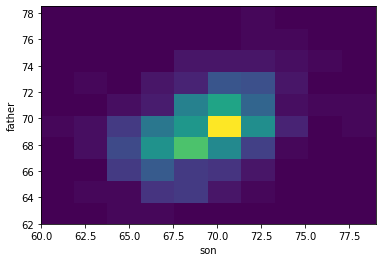

In [4]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.hist2d(Gdata_son.Height,Gdata_son.Father)
ax.set_xlabel('son')
ax.set_ylabel('father')
Gdata_son.Height.mean()

### Step 2 (2pts)

Select $X$ and $Y$ such that they have the same gender. Now compute the conditional distribution $p(y\mid x > 71)$ (for fathers and sons) or $p(y\mid x > 66)$ (for mothers and daughters). Plot their histograms and compute their means.

Answer these three questions:

* What do you find?
* With the same data, can you think of a way to test whether tall parents are causally responsible for their children being less tall?
* If there is no causal connection, what does that mean for conditioning on extreme events?

'\nI dont think I can say much from looking at these histograms, much less so about causality.\nin general, conditioning on extreme events means a small effective sample size,\n  limiting the inferences that can be made.\n'

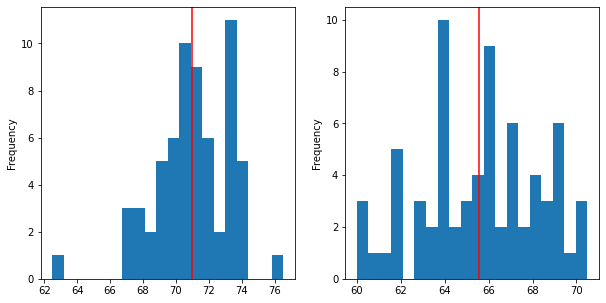

In [5]:
f,axar = plt.subplots(1,2,figsize=(10,5))

ax = axar[0]
Gdata_son = Gdata[(Gdata.Gender == 'M') & (Gdata.Father>71)]
Gdata_son.Height.plot.hist(ax=ax,bins=20)
ax.axvline(Gdata_son.Height.mean(),c='r')

ax = axar[1]
Gdata_dau = Gdata[(Gdata.Gender == 'F') & (Gdata.Mother>66)]
Gdata_dau.Height.plot.hist(ax=ax,bins=20)
ax.axvline(Gdata_dau.Height.mean(),c='r')

"""
I dont think I can say much from looking at these histograms, much less so about causality.
in general, conditioning on extreme events means a small effective sample size,
  limiting the inferences that can be made.
""" 

In [6]:
print(
'\nsons',
Gdata.Height[(Gdata.Gender == 'M')].mean(),
'\nsons tall fathers',
Gdata.Height[(Gdata.Gender == 'M') & (Gdata.Father>71)].mean(),
'\ndaughters',
Gdata.Height[(Gdata.Gender == 'F')].mean(),
'\ndaughters tall mothers',
Gdata.Height[(Gdata.Gender == 'F') & (Gdata.Mother>66)].mean(),
)


sons 69.22881720430114 
sons tall fathers 70.96249999999999 
daughters 64.11016166281759 
daughters tall mothers 65.57285714285712


## Problem 3: Likelihood vs Prior (1pt)

Leveraging again `scipy.stats`, reproduce the figure from [this](https://twitter.com/avehtari/status/1218896617346162688?s=20) tweet. To see it here, execute the next cell.

In detail, choose [Student's t distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t) with 4 degrees of freedom and the standard normal distribution for either the likelihood or the prior, but separate them by $\delta x=10$. Compute and plot the posteriors.

Which of these prior distributions is more robust to outliers in the data?

In [7]:
import requests

class Tweet(object):
    def __init__(self, s, embed_str=False):
        if not embed_str:
            # Use Twitter's oEmbed API
            # https://dev.twitter.com/web/embedded-tweets
            api = 'https://publish.twitter.com/oembed?url={}'.format(s)
            response = requests.get(api)
            self.text = response.json()["html"]
        else:
            self.text = s

    def _repr_html_(self):
        return self.text

Tweet("https://twitter.com/avehtari/status/1218896617346162688?s=20")

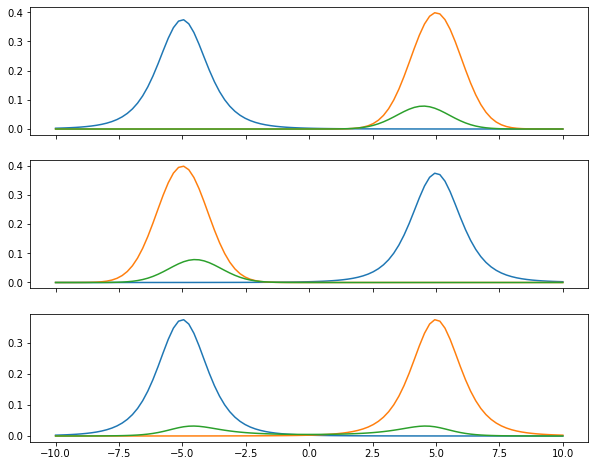

In [8]:
f,axar = plt.subplots(3,1,figsize=(10,8),sharex=True)
xplt = np.linspace(-10,10,100)

rvL = [
  (t(4,loc=-5),norm(loc=5)),
  (t(4,loc=5),norm(loc=-5)),
  (t(4,loc=-5),t(4,loc=5))
]

for idx in range(3):
  rv1,rv2 = rvL[idx]
  ax = axar[idx]
  post = rv1.pdf(xplt)*rv2.pdf(xplt)/(np.sum(rv1.pdf(xplt)*rv2.pdf(xplt)))
  ax.plot(xplt,rv1.pdf(xplt))
  ax.plot(xplt,rv2.pdf(xplt))
  ax.plot(xplt,post)

In [9]:
"""
normal prior is more robust. this can be seen in the figure
  where the posterior of the normal prior budges the least.
"""

'\nnormal prior is more robust. this can be seen in the figure\n  where the posterior of the normal prior budges the least.\n'

## Problem 4: Hubble was no Bayesian (4pts)

...but you can be!

In 1929, Edwin Hubble published a seminal [paper](http://www.pnas.org/content/pnas/15/3/168.full.pdf), in which he compared the radial velocity of astronomical objects (i.e. how fast these objects move towards or away from us) with their distance. The former can be done pretty precisely with spectroscopy, the latter is much more uncertain.

He saw that the velocity increases with distance and speculated that this could be the sign of a cosmological expansion. This lead cosmologist to believe in the Big Bang theory.

### Step 0:

Load the data from the file `hubble.txt` into an array with `numpy.genfromtxt`, and make again use of the arguments `names` and `dtype`. You should get 6 columns
   * `CAT`, `NUMBER`:  These two combined give you the name of the galaxy.
   * `R`: distance in Mpc
   * `V`: radial velocity in km/s
   * `RA`, `DEC`: equatorial coordinates of the galaxy
   
Make a scatter plot of $R$ vs $V$ (that means the independent variable is $V$). Don't forget labels and units...

In [10]:
hdata = pd.read_csv('hubble.txt',delimiter='\t',dtype=None).drop('DEC',axis='columns')
hdata.columns = ['cat','number','R','V','RA','dec']
hdata.head()

,cat,number,R,V,RA,dec
0,Mag,S,0.032,170,00:51:00,-73:06:00
1,Mag,L,0.034,290,05:24:00,-69:48:00
2,NGC,6822,0.214,-130,19:44:58,-14:48:12
3,NGC,598,0.263,-70,01:31:02,30:24:15
4,NGC,221,0.275,-185,00:39:58,40:35:20


<AxesSubplot:xlabel='V', ylabel='R'>

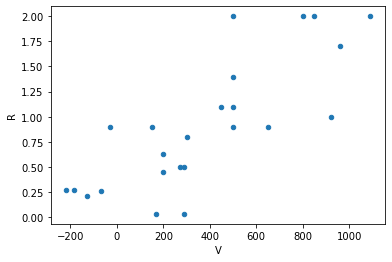

In [42]:
hdata.plot.scatter('V','R')

### Step 1 (1pt):

Use linear regression to determine the MLE of the slope $b$ for the line $R=b V$. This is a linear model **with no intercept**. Print the MLE. Then, create a new version of the scatter plot by adding the MLE line.

**Tip:** You don't need measurement uncertainties (there aren't any in Hubble's data) to determine the MLE.


reminder: 
$
\theta_{MLE} = [X'\Sigma^{-1}X]^{-1}X'\Sigma^{-1}y
$


In [56]:
V = np.expand_dims(hdata.V,1)
R = np.expand_dims(hdata.R,1)
sig = np.eye(len(V))
b = np.linalg.inv(V.T @ sig @ V) @ V.T @ sig @ R 
b

array([[0.00192181]])

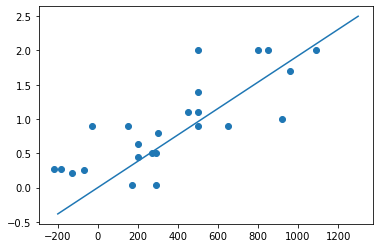

In [61]:
theta = b.squeeze()
ax = plt.gca()
ax.plot(np.linspace(-200,1300,100),theta*np.linspace(-200,1300,100))
ax.scatter(V,R)

### Step 2 (2pts):

The full Gaussian likelihood of the linear regression problem has a term for the intercept $a$, slope $b$, and *uncertainty* $\sigma$ of $R$. We will assume that the uncertainties of all data points are identical. Adopt maximally uniformative priors for all of the parameters $\theta=(a,b,\sigma)$.

Compute the log posterior on a reasonably fine grid of $(a,b,\sigma)$, picking suitable limits for every parameter. Then marginalize out $\sigma$ and plot the log posterior for the remaining parameters $(a,b)$.

**Tip:** The function `scipy.special.logsumexp` is useful.

### Step 3 (1pt):

Use the function `sample_2d` below to draw samples from the 2D array of the posterior of $(a,b)$. Create a final version of the scatter plot by adding the lines that correspond to these posterior draws.

**Tip:** When plotting, set the transparency `alpha` to values < 1, so that multiple draws of the same parameter pair become visually more important.

In [ ]:
# taken from https://stackoverflow.com/questions/56017163
def sample_2d(dist2d, n=50, replace=True):
    """
    Given an array representing a 2D joint probability distribution p(x,y), return n index pairs (i_x, i_y) sampled
    according to that distribution
    """
    import numpy as np

    shape = dist2d.shape
    N = np.prod(shape)
    
    # generate the set of all x,y pairs represented by the pmf
    pairs=np.indices(dimensions=shape).T # here are all of the x,y pairs 

    # make n random selections from the flattened pmf
    inds = np.random.choice(np.arange(N), p=dist2d.reshape(N), size=n, replace=replace)

    # inds is the set of n randomly chosen indicies into the flattened dist array...
    # therefore the random x,y selections
    # come from selecting the associated elements
    # from the flattened pairs array
    return pairs.reshape(-1,2)[inds]